In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# E-commerce shipping data set
#product shipment Delivered on time or not?
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data set /shipping_company.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
# Number of rows and columns
df.shape

(10999, 12)

In [ ]:
#Columns name
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# Checking the missing values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#Droping irrelevant columns and nan rows
df.drop(['ID','Gender'],axis=1,inplace=True)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,1,1538,1
10995,B,Ship,4,1,232,5,medium,6,1247,0
10996,C,Ship,5,4,242,5,low,4,1155,0
10997,F,Ship,5,2,223,6,medium,2,1210,0


In [ ]:
# column types
df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


**Data Visualization**

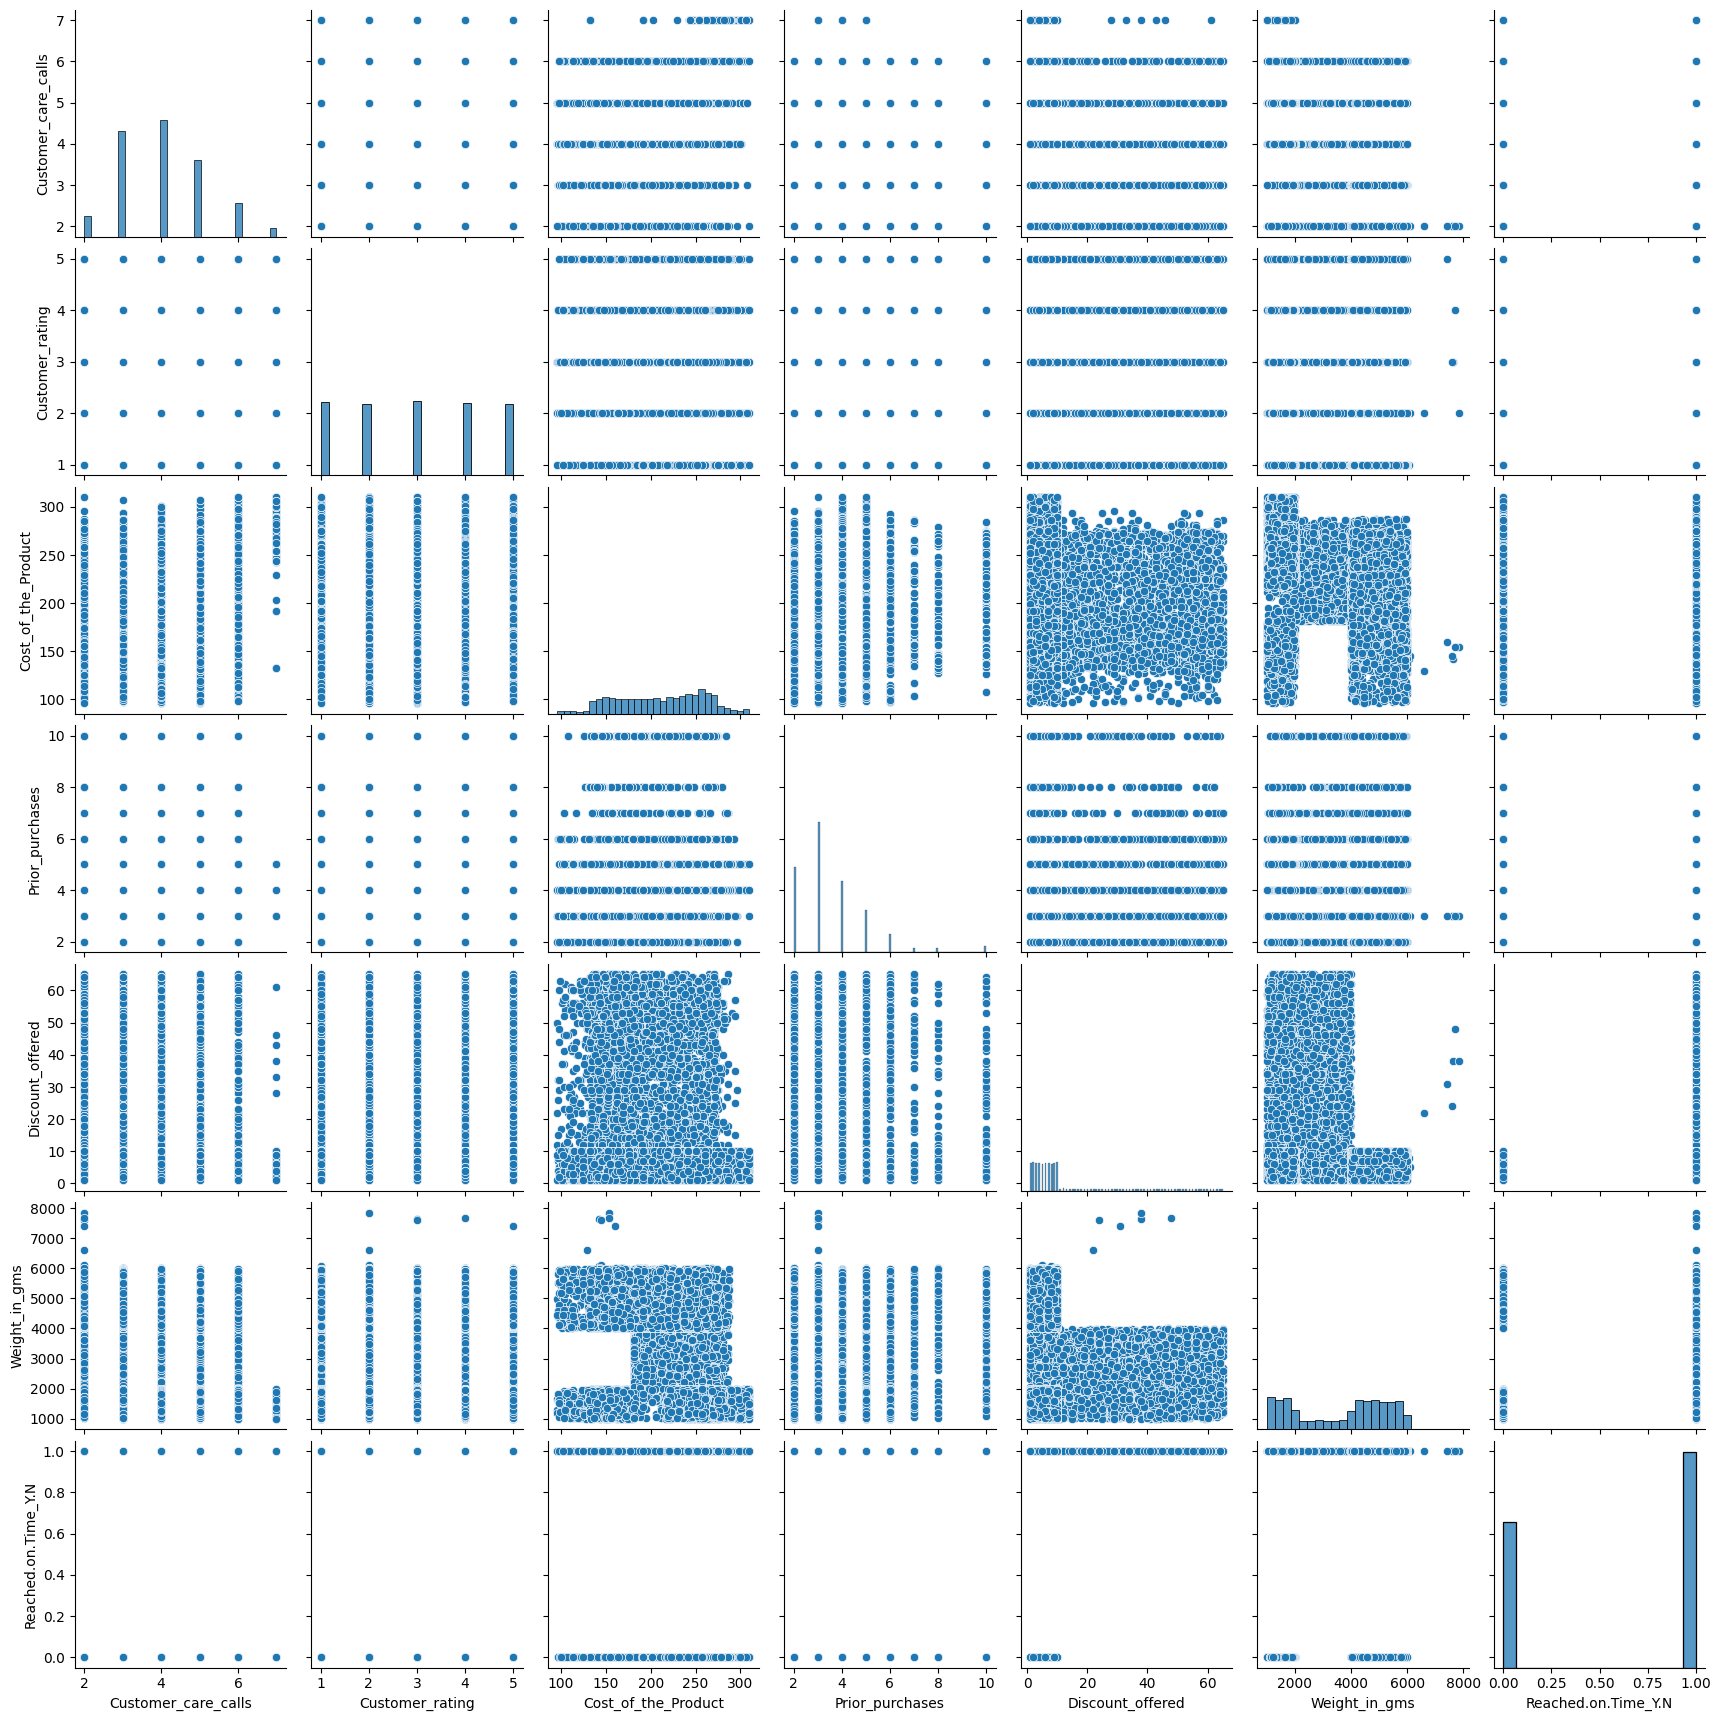

In [ ]:
#pairplot
sns.pairplot(df)

<Axes: >

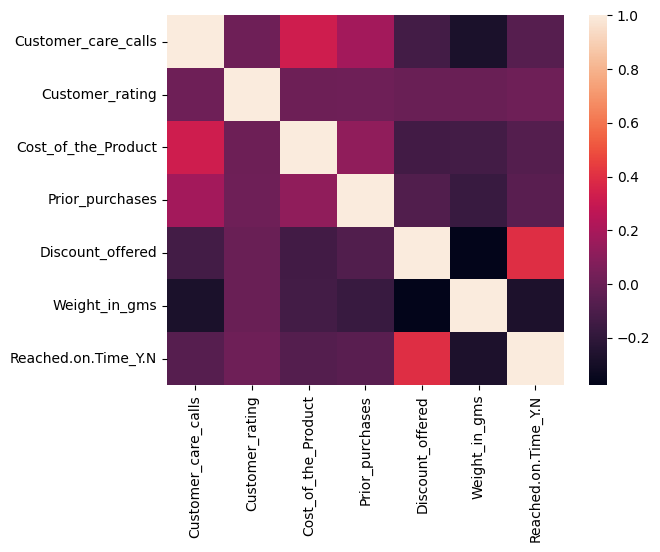

In [ ]:
#Heatmap
sns.heatmap(df.corr())

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

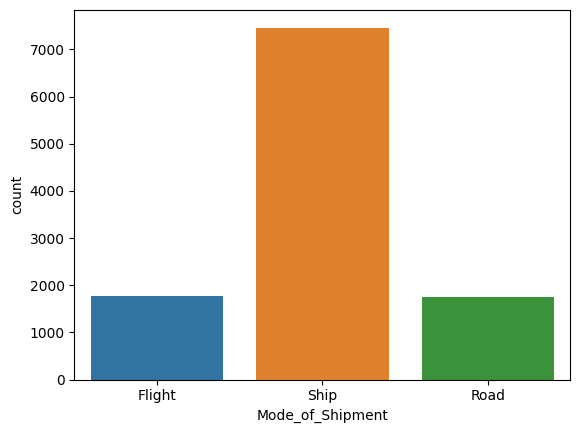

In [ ]:
#mode of shipment countplot
sns.countplot(x='Mode_of_Shipment',data=df)


<Axes: xlabel='Warehouse_block', ylabel='count'>

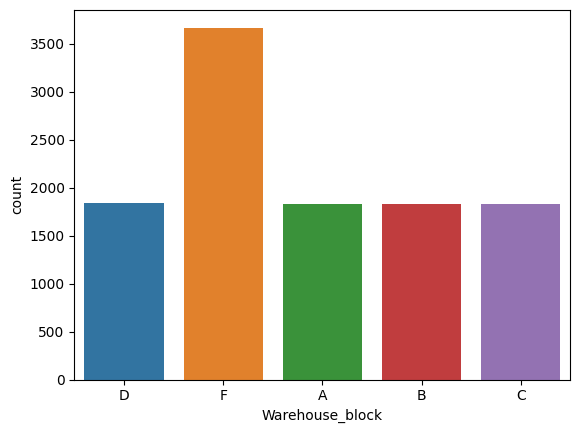

In [ ]:
#Warehouse_block countplot
sns.countplot(x='Warehouse_block',data=df)


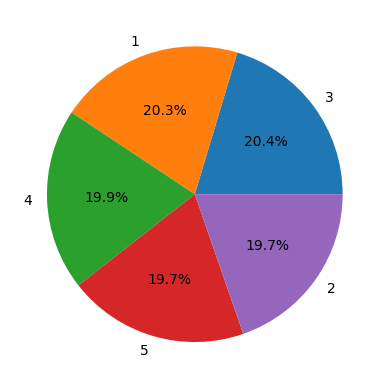

In [ ]:
customer_rating_count=df['Customer_rating'].value_counts()
plt.pie(customer_rating_count,labels=customer_rating_count.index,autopct='%1.1f%%')
plt.show()

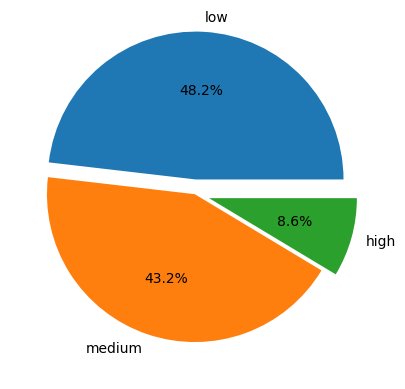

In [ ]:
Product_importance_count=df['Product_importance'].value_counts()
plt.pie(Product_importance_count,labels=Product_importance_count.index,autopct='%1.1f%%',explode=[0.1,0,0.1])
plt.show()

<Axes: xlabel='Mode_of_Shipment', ylabel='Weight_in_gms'>

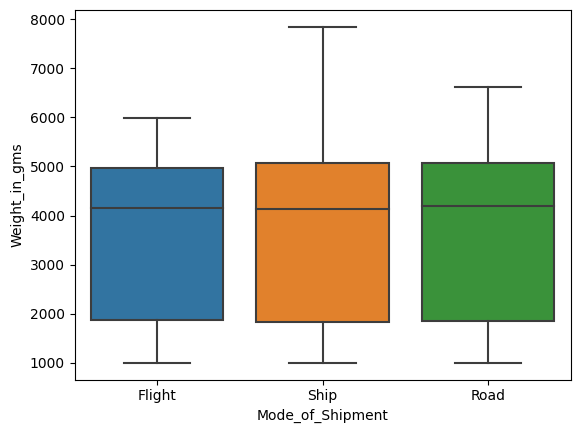

In [ ]:
sns.boxplot(x='Mode_of_Shipment',y='Weight_in_gms',data=df)

In [ ]:
#converting object type values to numerical values
le=LabelEncoder()
lst=['Warehouse_block','Mode_of_Shipment','Product_importance']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
#splitting the dataset
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,y)


In [ ]:
# implementing scaling method
sc=MinMaxScaler()
X=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

Feature Extraction

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
X_train

array([[-0.2852754 , -0.29296303, -0.564417  , ..., -0.19043693,
         0.3939207 ,  0.17725389],
       [-0.25120677,  0.50700309,  0.59366698, ..., -0.1732238 ,
        -0.00679712,  0.04101552],
       [ 0.26805493,  0.0054485 ,  0.25432043, ..., -0.20925777,
         0.02513195, -0.1846058 ],
       ...,
       [ 0.34437829,  0.52454609,  0.11524976, ..., -0.07347667,
         0.03954615, -0.17001316],
       [-0.21444204,  0.32534576,  0.27721069, ...,  0.01838245,
         0.1419371 ,  0.18999989],
       [-0.36935297, -0.37914973, -0.08425477, ...,  0.20124244,
        -0.00667058, -0.33272378]])

In [ ]:
pca.explained_variance_ratio_

array([0.19664059, 0.18047232, 0.15916744, 0.13156721, 0.1158306 ,
       0.09417259, 0.04830353, 0.04145587, 0.03238984])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1297
           1       0.74      0.59      0.65      1329

    accuracy                           0.69      2626
   macro avg       0.70      0.69      0.68      2626
weighted avg       0.70      0.69      0.68      2626



In [ ]:
#SVM
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77      1297
           1       0.94      0.45      0.61      1329

    accuracy                           0.71      2626
   macro avg       0.79      0.71      0.69      2626
weighted avg       0.79      0.71      0.69      2626



In [ ]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74      1297
           1       0.85      0.47      0.61      1329

    accuracy                           0.69      2626
   macro avg       0.74      0.69      0.68      2626
weighted avg       0.74      0.69      0.67      2626



In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1297
           1       0.67      0.65      0.66      1329

    accuracy                           0.66      2626
   macro avg       0.66      0.66      0.66      2626
weighted avg       0.66      0.66      0.66      2626



In [ ]:
#decision tree hypertuning
parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=2)
dt1.fit(X_train,y_train)
y_predd3=dt1.predict(X_test)
print(classification_report(y_test,y_predd3))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76      1297
           1       0.90      0.45      0.60      1329

    accuracy                           0.70      2626
   macro avg       0.77      0.70      0.68      2626
weighted avg       0.77      0.70      0.68      2626



In [ ]:
#randomboosting
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1297
           1       0.77      0.56      0.65      1329

    accuracy                           0.69      2626
   macro avg       0.71      0.69      0.69      2626
weighted avg       0.71      0.69      0.69      2626



In [ ]:
# randomforest hypertunning
parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=10)
rf1.fit(X_train,y_train)
y_predd4=rf1.predict(X_test)
print(classification_report(y_test,y_predd4))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77      1297
           1       0.89      0.50      0.64      1329

    accuracy                           0.72      2626
   macro avg       0.77      0.72      0.70      2626
weighted avg       0.77      0.72      0.70      2626



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()
lst1=[ad,gb,xb]
for i in lst1:
  i.fit(X_train,y_train)
  y_pred5=i.predict(X_test)
  print(classification_report(y_test,y_pred5))


              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1297
           1       0.79      0.54      0.64      1329

    accuracy                           0.69      2626
   macro avg       0.71      0.69      0.68      2626
weighted avg       0.71      0.69      0.68      2626

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      1297
           1       0.88      0.50      0.64      1329

    accuracy                           0.71      2626
   macro avg       0.76      0.72      0.70      2626
weighted avg       0.77      0.71      0.70      2626

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1297
           1       0.77      0.60      0.67      1329

    accuracy                           0.71      2626
   macro avg       0.72      0.71      0.70      2626
weighted avg       0.72      0.71      0.70      2626

